### This is numpy's quickstart tutorial, found [here](https://numpy.org/doc/stable/user/quickstart.html#broadcasting-rules).

**ndarray.dtype** is an object describing the type of the elements in the array.  

**ndarray.shape** returns a tuple indicating the size of the array in each dimension. The length of this tuple is **ndarray.ndim**, the number of dimensions.

In [3]:
import numpy as np
rg = np.random.default_rng(1)

In [10]:
A = np.arange(15).reshape(3, 5)
print(A)

[[ 0  1  2  3  4]
 [ 5  6  7  8  9]
 [10 11 12 13 14]]


In [12]:
print(A.dtype)

int64


In [13]:
for element in A.flat:
    print(element)

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14


In [15]:
def f(x, y):
    return 10*x + y

B = np.fromfunction(f, (3, 3))
print(B)

[[ 0.  1.  2.]
 [10. 11. 12.]
 [20. 21. 22.]]


In [16]:
B[:, 2]

array([ 2., 12., 22.])

In [17]:
B[..., 2]

array([ 2., 12., 22.])

In [18]:
B[2, ...]

array([20., 21., 22.])

In [19]:
B.flat

In [27]:
C = np.floor(10*rg.random((3, 3)))
D = np.floor(10*rg.random((3, 3)))

array([[0., 5., 4.],
       [0., 6., 8.],
       [5., 2., 8.],
       [5., 5., 7.],
       [1., 8., 6.],
       [7., 1., 8.]])

You can stack multiple arrays together using vstack or hstack.

In [43]:
np.vstack((D, C))
np.hstack((C, D))

array([[0., 5., 4., 5., 5., 7.],
       [0., 6., 8., 1., 8., 6.],
       [5., 2., 8., 7., 1., 8.]])

You can also split an array into several smaller ones.

In [44]:
E = np.floor(10*rg.random((2, 12)))

In [47]:
print(E)
np.hsplit(E, 3)

[[1. 0. 8. 8. 8. 4. 2. 0. 6. 7. 8. 2.]
 [2. 6. 8. 9. 1. 4. 8. 4. 5. 0. 6. 9.]]


[array([[1., 0., 8., 8.],
        [2., 6., 8., 9.]]),
 array([[8., 4., 2., 0.],
        [1., 4., 8., 4.]]),
 array([[6., 7., 8., 2.],
        [5., 0., 6., 9.]])]

In [49]:
np.vsplit(E, 2)

[array([[1., 0., 8., 8., 8., 4., 2., 0., 6., 7., 8., 2.]]),
 array([[2., 6., 8., 9., 1., 4., 8., 4., 5., 0., 6., 9.]])]

### Copies and views
- Assignments and function calls make no copy;

In [50]:
a = np.ones((3, 3))
b = a
b is a

True

- Views are shallow copies——new array objects that look at the same data
- Slices are also views.

In [52]:
c = a.view()
c is a

False

In [54]:
c.base is a       # c is a view of the data owned by a
c.flags.owndata   # False, as above

False

The `copy` method makes a complete copy of the array and its data.

In [55]:
d = a.copy()
d is a

False

(array([0.00128706, 0.00257412, 0.00257412, 0.00257412, 0.00772237,
        0.00900943, 0.01415767, 0.03861183, 0.04247301, 0.03989889,
        0.05663068, 0.08623308, 0.13900258, 0.16088261, 0.24454157,
        0.30117225, 0.34750645, 0.41700774, 0.51997261, 0.60234451,
        0.68214229, 0.69501289, 0.78768128, 0.73619884, 0.79540365,
        0.78896834, 0.72976354, 0.7014482 , 0.69501289, 0.60749275,
        0.57660329, 0.4478972 , 0.39126652, 0.28186634, 0.24196745,
        0.20592975, 0.13385434, 0.10425193, 0.07851072, 0.04762125,
        0.0296024 , 0.03217652, 0.01029649, 0.00900943, 0.0064353 ,
        0.00772237, 0.00514824, 0.00128706, 0.00257412, 0.00128706]),
 array([0.08106893, 0.15876533, 0.23646173, 0.31415813, 0.39185453,
        0.46955093, 0.54724733, 0.62494373, 0.70264013, 0.78033653,
        0.85803293, 0.93572933, 1.01342573, 1.09112213, 1.16881853,
        1.24651493, 1.32421133, 1.40190773, 1.47960413, 1.55730053,
        1.63499693, 1.71269333, 1.79038973, 1.

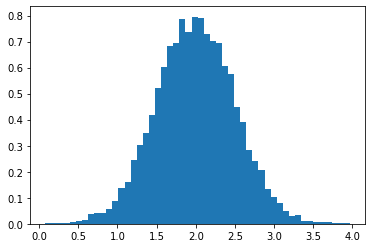

In [4]:
import matplotlib.pyplot as plt
mu, sigma = 2, 0.5
v = rg.normal(mu, sigma, 10000)
plt.hist(v, bins=50, density=1)

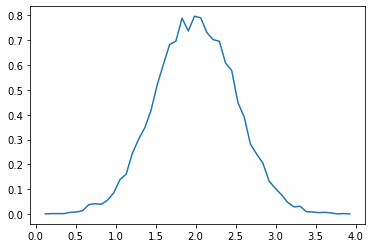

In [5]:
(n, bins) = np.histogram(v, bins=50, density=True)
plt.plot(.5*(bins[1:]+bins[:-1]), n)

The difference between these two histograms (one from matplotlib and one from numpy) is that the np one doesn't automatically plot——it just generates the data.